# 📊 From Data to Decisions: A Machine Learning Journey
**Author:** Sabriya Sowers
🔗 [GitHub Repository](https://github.com/ssowers2/datafun-07-applied)

In [ ]:
import sys
import os
import IPython
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow as pa
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from scipy import stats

print("Imports loaded successfully!")

Imports loaded successfully!


## Part 1: Chart a Straight Line

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

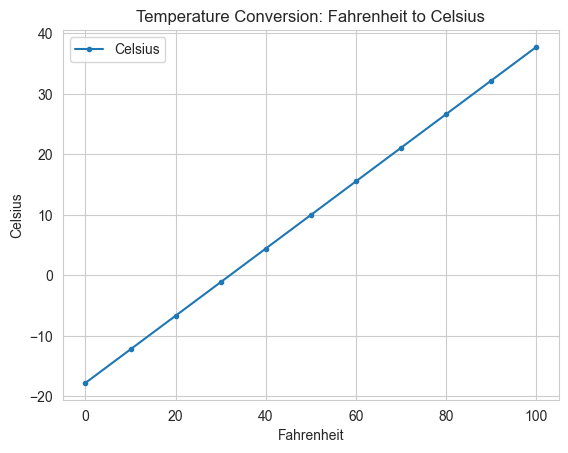

In [58]:
# Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples (Fahrenheit, Celsius)
temps = [(f, c(f)) for f in range (0, 101, 10)]

# print(temps)

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
axes.set_title("Temperature Conversion: Fahrenheit to Celsius");  # Graph Title ";" removes text above chart

# Loading dataset
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
display(nyc_df.head())  
display(nyc_df.tail())

# Cleaning the data by renaming columns for better readability (ex: Value to Temperature)
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
display(nyc_df.head(3))
nyc_df.Date.dtype

#Truncate the last two digits in the year (Coverts 189501 to 1895)
nyc_df.Date = nyc_df.Date.floordiv(100)
display(nyc_df.head())

#Calculating basic descriptive stats for the dataset
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

## Part 2 - Prediction

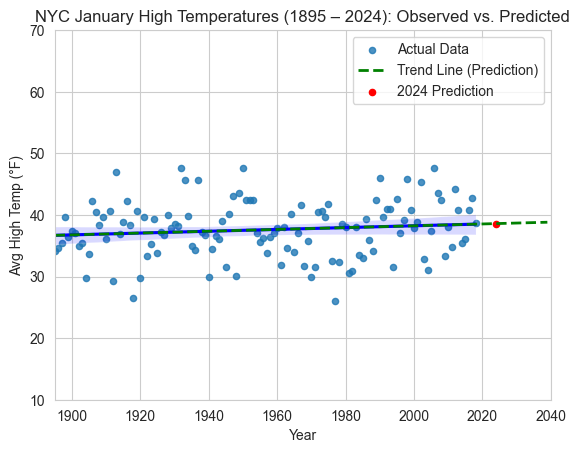

In [92]:
# Plotting the average high temperatures and a regression line

# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
# display(linear_regression.slope)
# display(linear_regression.intercept)

# Predict the average high temp for 2024
forecast_2024 = linear_regression.slope * 2024 + linear_regression.intercept

# Generate an extended range of years (from dataset start to 2024)
extended_years = np.arange(nyc_df.Date.min(), 2040)  # Extends past 2024 for clarity
predicted_temps = linear_regression.slope * extended_years + linear_regression.intercept  # Predicted line

# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label="Actual Data")

# Plot the regression line manually so it extends to 2024
plt.plot(extended_years, predicted_temps, color='green', linestyle='--', linewidth=2, label="Trend Line (Prediction)")

# Plot the predicted temperature for 2024 as a red dot so it stands out
plt.scatter(2024, forecast_2024, color='red', marker='o', s=20, label='2024 Prediction')

# # Set X and Y limits
plt.xlim(nyc_df.Date.min(), 2040) # Extends past 2024 for clarity
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend();